In [1]:
# Credit Card Fraud Detection

##import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Loading the dataset to a Pandas DataFrame
import os

In [3]:
os.getcwd()

'D:\\Credit\\condabin\\card'

In [4]:
os.chdir('C:\\Users\\User\\Downloads\\creditcard.csv')

In [5]:
os.getcwd()

'C:\\Users\\User\\Downloads\\creditcard.csv'

In [6]:
data = pd.read_csv('creditcard.csv')

In [7]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
# dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Exploratory Data Analytics(Any Missing Number)

data.isnull().values.any()

False

In [10]:
# checkimg the number of missing in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

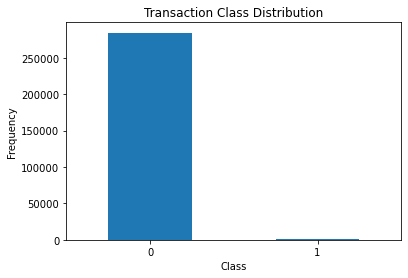

In [12]:
# Trasaction Class Destribution

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
# distribution of legit transactions and fraudulent transactions
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [15]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
#statistical measures of the data (For Legit Trasactions)
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
#statistical measures of the data (For Fraud Trasactions)
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
# compaare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
# Under Sampling
# Build a sample dataset containing similar distribution of Normal trasaction and Fraudulent trasaction 

# Number of Fraudulent Trasactions = 492
legit_sample = legit.sample(n = 492)

In [20]:
#concatinating two dataframes
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [21]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158948,112006.0,-1.191115,0.841003,0.580674,0.635019,-0.259729,-0.587128,-0.072637,0.528715,-1.499614,...,-0.388155,-0.774626,-0.196066,-0.291499,0.533490,-0.344229,0.257454,0.081089,55.00,0
175443,122342.0,2.198922,-0.544879,-1.111091,-0.722763,-0.632335,-1.534330,-0.142904,-0.477762,-0.657003,...,0.065941,0.305895,0.245663,0.437452,-0.045962,-0.303984,-0.028208,-0.058836,3.96,0
229046,145777.0,1.382477,-3.223481,-1.009774,-1.319221,-1.598547,1.364439,-1.337289,0.247288,-0.506019,...,-0.155986,-0.798884,-0.121550,-0.479974,-0.523626,-0.370008,-0.022356,0.029079,465.00,0
65068,51418.0,1.207025,-0.129626,-1.344997,-0.525871,2.145811,3.145669,-0.231371,0.733719,-0.236602,...,-0.516048,-1.839854,0.173206,0.959056,0.231778,-0.119999,-0.052622,0.022015,64.00,0
147242,88281.0,-0.059592,1.086027,-0.479766,0.011436,2.114502,-0.120043,1.747813,-0.384236,-1.061519,...,0.169430,0.653945,-0.650604,-1.448828,0.471469,-0.328746,-0.049244,-0.104937,3.99,0


In [22]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [24]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97212.300813,-0.099113,0.149209,-0.009897,0.048264,0.094235,0.068845,0.046243,0.037613,0.018047,...,0.032034,0.034370,-0.010558,0.024808,-0.002307,-0.018066,-0.020141,0.006448,0.006074,85.785203
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
#splitting the data into Features and targets

X = new_dataset.drop(columns = 'Class', axis = 1)
Y = new_dataset['Class']

In [26]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
158948  112006.0 -1.191115  0.841003  0.580674  0.635019 -0.259729 -0.587128   
175443  122342.0  2.198922 -0.544879 -1.111091 -0.722763 -0.632335 -1.534330   
229046  145777.0  1.382477 -3.223481 -1.009774 -1.319221 -1.598547  1.364439   
65068    51418.0  1.207025 -0.129626 -1.344997 -0.525871  2.145811  3.145669   
147242   88281.0 -0.059592  1.086027 -0.479766  0.011436  2.114502 -0.120043   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [27]:
print(Y)

158948    0
175443    0
229046    0
65068     0
147242    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [28]:
# split the data into Training data & Testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [30]:
# Model Training
# Logistic Regression

model = LogisticRegression()

In [31]:
# training the Logistic Regression model with traning data

model.fit(X_train, Y_train)

LogisticRegression()

In [32]:
# Model Evaluation
# Accuracy Score

# Accuracy on Training Data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 0.9390088945362135


In [34]:
# Accuracy on Testing Data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [35]:
print('Accuracy score on test data:', test_data_accuracy)

Accuracy score on test data: 0.9086294416243654
